In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [61]:
data = pd.read_csv('data/spx_weeklies.csv')
data_long = pd.read_csv('data/spx_nonweeklies.csv')
spx = pd.read_csv('data/spx_prices_daily.csv')

In [373]:
data['strike_price'] = data['strike_price']/1000

In [374]:
print(data.shape, data_long.shape, spx.shape)

(3205352, 19) (4871519, 38) (3416, 8)


In [375]:
print(len(data['optionid'].unique()))

print(data['optionid'].unique())
i = 0

574548
[ 81166310  81166311  81166312 ... 152444005 152444006 152444007]


In [376]:
print(data[data['am_settlement']==1].shape)

(352058, 19)


In [377]:
i = 500

In [378]:
id = data['optionid'].unique()[i]

print(data[data['optionid']==id])
i += 1

           date             symbol     exdate   last_date cp_flag  \
1334 2012-01-17  SPX 120121P840000 2012-01-21  21/12/2011       P   
1656 2012-01-18  SPX 120121P840000 2012-01-21  21/12/2011       P   
1978 2012-01-19  SPX 120121P840000 2012-01-21  21/12/2011       P   

      strike_price  best_bid  best_offer  volume  open_interest  \
1334         840.0       0.0        0.05       0           2339   
1656         840.0       0.0        0.05       0           2339   
1978         840.0       0.0        0.05       0           2339   

      impl_volatility     delta     gamma      vega     theta  optionid  \
1334         1.817029 -0.000525  0.000011  0.177902 -29.51151  74016159   
1656         2.629502 -0.000508  0.000010  0.123410 -59.23703  74016159   
1978              NaN       NaN       NaN       NaN       NaN  74016159   

      am_settlement expiry_indicator  maturity  
1334              1              NaN         4  
1656              1              NaN         3  
1978  

In [379]:
print(data[data['date'] == data['exdate']].dropna())

Empty DataFrame
Columns: [date, symbol, exdate, last_date, cp_flag, strike_price, best_bid, best_offer, volume, open_interest, impl_volatility, delta, gamma, vega, theta, optionid, am_settlement, expiry_indicator, maturity]
Index: []


In [380]:
print(data[data['date'] == data['exdate']])

              date               symbol     exdate   last_date cp_flag  \
324     2012-01-06  SPXW 120106C1000000 2012-01-06         NaN       C   
325     2012-01-06  SPXW 120106C1025000 2012-01-06         NaN       C   
326     2012-01-06  SPXW 120106C1050000 2012-01-06  05/01/2012       C   
327     2012-01-06  SPXW 120106C1075000 2012-01-06         NaN       C   
328     2012-01-06  SPXW 120106C1100000 2012-01-06         NaN       C   
...            ...                  ...        ...         ...     ...   
3203791 2023-02-28  SPXW 230228P5000000 2023-02-28  27/02/2023       P   
3203792 2023-02-28  SPXW 230228P5100000 2023-02-28         NaN       P   
3203793 2023-02-28  SPXW 230228P5200000 2023-02-28         NaN       P   
3203794 2023-02-28  SPXW 230228P5300000 2023-02-28         NaN       P   
3203795 2023-02-28  SPXW 230228P5400000 2023-02-28  07/02/2023       P   

         strike_price  best_bid  best_offer  volume  open_interest  \
324            1000.0     276.2       280

In [381]:
print(data[data['maturity']==0]['am_settlement'].unique()) # same day options cannot expire in the morning..
print(data[data['maturity']==1]['am_settlement'].unique())
print(data[data['maturity']==2]['am_settlement'].unique())
print(data[data['maturity']==3]['am_settlement'].unique())
print(data[data['maturity']==4]['am_settlement'].unique())
print(data[data['maturity']==5]['am_settlement'].unique())

[0]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


In [382]:
print(data[data['date'] == data['exdate']]['am_settlement'].unique())

[0]


In [383]:
print(data.columns)

Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator', 'maturity'],
      dtype='object')


In [384]:
print(spx)

            Date         Open         High          Low        Close  \
0     14/01/2011  1282.900024  1293.239990  1281.239990  1293.239990   
1     18/01/2011  1293.219971  1296.060059  1290.160034  1295.020020   
2     19/01/2011  1294.520020  1294.599976  1278.920044  1281.920044   
3     20/01/2011  1280.849976  1283.349976  1271.260010  1280.260010   
4     21/01/2011  1283.630005  1291.209961  1282.069946  1283.349976   
...          ...          ...          ...          ...          ...   
3411  07/08/2024  5293.129883  5330.640137  5195.540039  5199.500000   
3412  08/08/2024  5252.569824  5328.029785  5233.850098  5319.310059   
3413  09/08/2024  5314.660156  5358.669922  5300.839844  5344.160156   
3414  12/08/2024  5351.879883  5371.200195  5324.370117  5344.390137   
3415  13/08/2024  5376.979980  5436.500000  5376.979980  5434.430176   

        Adj Close      Volume       date  
0     1293.239990  4661590000 2011-01-14  
1     1295.020020  5284990000 2011-01-18  
2     

In [385]:
print(data.head())

        date               symbol     exdate last_date cp_flag  strike_price  \
0 2012-01-03  SPXW 120106C1000000 2012-01-06       NaN       C        1000.0   
1 2012-01-03  SPXW 120106C1025000 2012-01-06       NaN       C        1025.0   
2 2012-01-03  SPXW 120106C1050000 2012-01-06       NaN       C        1050.0   
3 2012-01-03  SPXW 120106C1075000 2012-01-06       NaN       C        1075.0   
4 2012-01-03  SPXW 120106C1100000 2012-01-06       NaN       C        1100.0   

   best_bid  best_offer  volume  open_interest  impl_volatility     delta  \
0     275.6       278.6       0              0         1.104842  0.993416   
1     250.6       253.6       0              0         1.004238  0.992830   
2     225.6       228.6       0              0         0.905286  0.992134   
3     200.6       203.6       0              0         0.807784  0.991292   
4     175.6       178.6       0              0         0.711508  0.990248   

      gamma      vega     theta  optionid  am_settlement

In [386]:
print(data.columns)

Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator', 'maturity'],
      dtype='object')


In [387]:
drop = []
for i in data.columns:
    print(i)
    print(data[i].unique())

    if len(data[i].unique()) == 1:
        drop.append(i)


date
['2012-01-03T00:00:00.000000000' '2012-01-04T00:00:00.000000000'
 '2012-01-05T00:00:00.000000000' ... '2023-02-24T00:00:00.000000000'
 '2023-02-27T00:00:00.000000000' '2023-02-28T00:00:00.000000000']
symbol
['SPXW 120106C1000000' 'SPXW 120106C1025000' 'SPXW 120106C1050000' ...
 'SPXW 230307P5000000' 'SPXW 230307P5200000' 'SPXW 230307P5400000']
exdate
['2012-01-06T00:00:00.000000000' '2012-01-13T00:00:00.000000000'
 '2012-01-21T00:00:00.000000000' ... '2023-03-03T00:00:00.000000000'
 '2023-03-06T00:00:00.000000000' '2023-03-07T00:00:00.000000000']
last_date
[nan '29/12/2011' '30/12/2011' ... '27/02/2023' '26/02/2023' '28/02/2023']
cp_flag
['C' 'P']
strike_price
[1000. 1025. 1050. 1075. 1100. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1160. 1165. 1170. 1175. 1180. 1185. 1190. 1195. 1200. 1205. 1210. 1215.
 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255. 1260. 1265. 1270. 1275.
 1280. 1285. 1290. 1295. 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335.
 1340. 1345. 1350. 1375. 1400. 142

In [388]:
data = data.drop(columns=drop)

In [389]:
print(data.shape)
print(data.columns)

(3205352, 19)
Index(['date', 'symbol', 'exdate', 'last_date', 'cp_flag', 'strike_price',
       'best_bid', 'best_offer', 'volume', 'open_interest', 'impl_volatility',
       'delta', 'gamma', 'vega', 'theta', 'optionid', 'am_settlement',
       'expiry_indicator', 'maturity'],
      dtype='object')


In [390]:
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')
data['exdate'] = pd.to_datetime(data['exdate'], format='%d/%m/%Y')

data['maturity'] = np.busday_count(data['date'].values.astype('datetime64[D]'), data['exdate'].values.astype('datetime64[D]'))

In [425]:
spx['date'] = pd.to_datetime(spx['Date'], format='%d/%m/%Y')
spx = spx.drop(columns='Date')

In [427]:
data = pd.merge(data, spx, on='date', how='left')

In [428]:
print(data.head())

        date               symbol     exdate last_date cp_flag  strike_price  \
0 2012-01-03  SPXW 120106C1000000 2012-01-06       NaN       C        1000.0   
1 2012-01-03  SPXW 120106C1025000 2012-01-06       NaN       C        1025.0   
2 2012-01-03  SPXW 120106C1050000 2012-01-06       NaN       C        1050.0   
3 2012-01-03  SPXW 120106C1075000 2012-01-06       NaN       C        1075.0   
4 2012-01-03  SPXW 120106C1100000 2012-01-06       NaN       C        1100.0   

   best_bid  best_offer  volume  open_interest  ...  optionid  am_settlement  \
0     275.6       278.6       0              0  ...  81166310              0   
1     250.6       253.6       0              0  ...  81166311              0   
2     225.6       228.6       0              0  ...  81166312              0   
3     200.6       203.6       0              0  ...  81166313              0   
4     175.6       178.6       0              0  ...  81166314              0   

   expiry_indicator  maturity         

In [429]:
data['moneyness'] = data['Adj Close'] / data['strike_price']

In [392]:
print(data['maturity'].unique())

[3 2 1 0 5 4]


In [393]:
print(data['strike_price'].unique())
print(len(data['strike_price'].unique()))

[1000. 1025. 1050. 1075. 1100. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1160. 1165. 1170. 1175. 1180. 1185. 1190. 1195. 1200. 1205. 1210. 1215.
 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255. 1260. 1265. 1270. 1275.
 1280. 1285. 1290. 1295. 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335.
 1340. 1345. 1350. 1375. 1400. 1425. 1005. 1010. 1015. 1020. 1030. 1035.
 1040. 1045. 1055. 1060. 1065. 1070. 1080. 1085. 1090. 1095. 1105. 1110.
 1115. 1120. 1355. 1360. 1365. 1370. 1380. 1385. 1390. 1395. 1410. 1420.
 1430. 1440. 1450. 1475.  150. 1500. 1525. 1550. 1600. 1700. 1900.  200.
  300.  350.  400.  500.  550.  575.  600.  625.  650.  675.  680.  700.
  710.  720.  725.  730.  740.  750.  760.  770.  775.  780.  785.  790.
  795.  800.  805.  810.  815.  820.  825.  830.  835.  840.  845.  850.
  855.  860.  865.  870.  875.  880.  885.  890.  895.  900.  905.  910.
  915.  920.  925.  930.  935.  940.  945.  950.  955.  960.  965.  970.
  975.  980.  985.  990.  995.  100. 1405. 1415. 14

In [394]:
# introduce moneyness instead of strike price
# Need stock price ( and 0 to 5 days ahead future price)
# or m = St / Kt (Almeida et al. )

# moneyness = ln(K/S) / (sigma_{atm} * sqrt (tau))
#m = ln(K/Fτ )√τIVatm,τ 

In [395]:
first_date = data['date'].min()
last_date = data['date'].max()

print("First Date:", first_date)
print("Last Date:", last_date)

First Date: 2012-01-03 00:00:00
Last Date: 2023-02-28 00:00:00


In [396]:
print(data['date'])

0         2012-01-03
1         2012-01-03
2         2012-01-03
3         2012-01-03
4         2012-01-03
             ...    
3205347   2023-02-28
3205348   2023-02-28
3205349   2023-02-28
3205350   2023-02-28
3205351   2023-02-28
Name: date, Length: 3205352, dtype: datetime64[ns]


In [397]:
calls = data[data['cp_flag']=='C']

In [398]:
print(calls.head())

        date               symbol     exdate last_date cp_flag  strike_price  \
0 2012-01-03  SPXW 120106C1000000 2012-01-06       NaN       C        1000.0   
1 2012-01-03  SPXW 120106C1025000 2012-01-06       NaN       C        1025.0   
2 2012-01-03  SPXW 120106C1050000 2012-01-06       NaN       C        1050.0   
3 2012-01-03  SPXW 120106C1075000 2012-01-06       NaN       C        1075.0   
4 2012-01-03  SPXW 120106C1100000 2012-01-06       NaN       C        1100.0   

   best_bid  best_offer  volume  open_interest  impl_volatility     delta  \
0     275.6       278.6       0              0         1.104842  0.993416   
1     250.6       253.6       0              0         1.004238  0.992830   
2     225.6       228.6       0              0         0.905286  0.992134   
3     200.6       203.6       0              0         0.807784  0.991292   
4     175.6       178.6       0              0         0.711508  0.990248   

      gamma      vega     theta  optionid  am_settlement

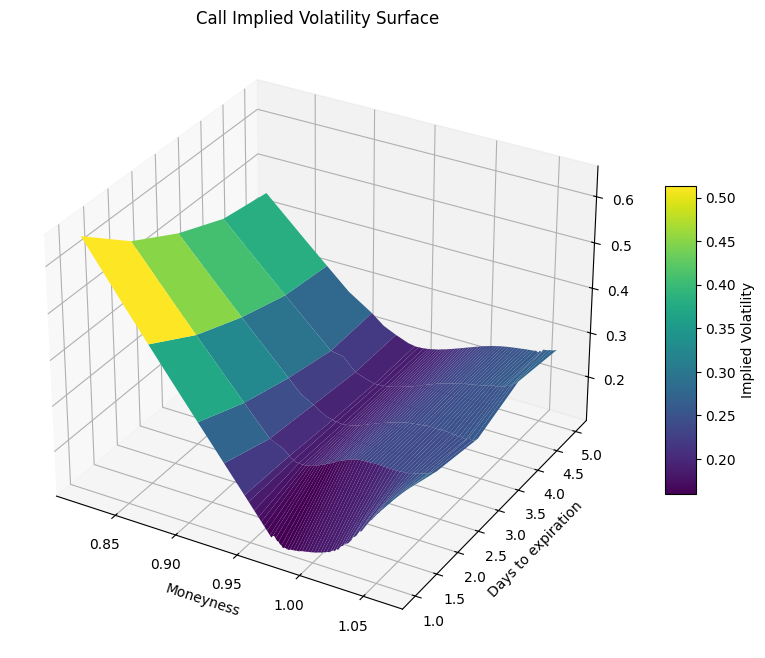

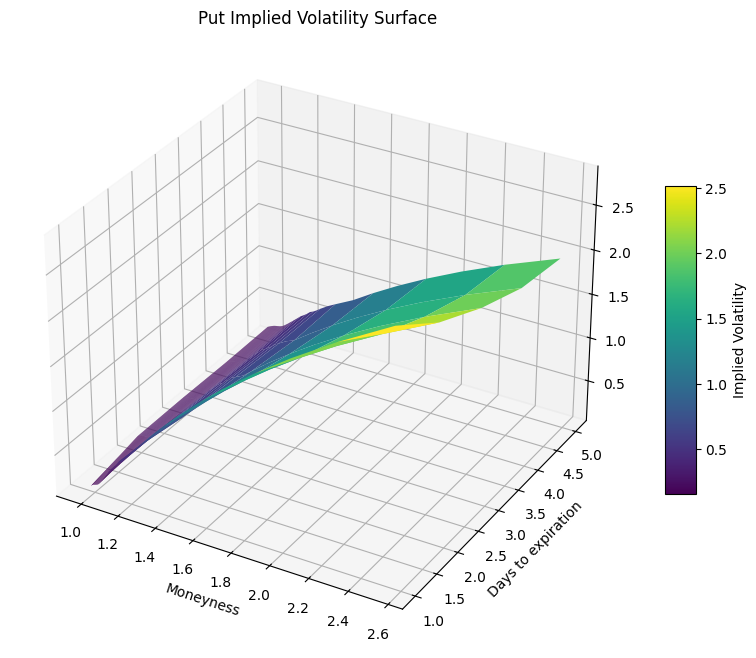

In [435]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def surface(date, option):
    # Pivot the DataFrame

    option_df = data[data['cp_flag']==option]
    option_df = option_df[option_df['date']==date]

    #print(option_df)
    surface = (
        option_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    # Create the figure object
    fig = plt.figure(figsize=(10, 8))

    # Add the subplot with projection argument
    ax = fig.add_subplot(111, projection='3d')

    # Get the 1D values from the pivoted DataFrame
    x, y = surface.columns.values, surface.index.values
    z = surface.values

    # Return coordinate matrices from coordinate vectors
    X, Y = np.meshgrid(x, y)

    # Set labels
    if option == 'C':
        text = 'Call'
    elif option == 'P':
        text = 'Put'
    else:
        text = 'Error'

    ax.set_xlabel('Moneyness')
    ax.set_ylabel('Days to expiration')
  
    ax.set_title(text + ' Implied Volatility Surface')

    # Plot with color map based on IV values
    surf = ax.plot_surface(Y, X, z, cmap='viridis')  # You can choose a different colormap if desired

    # Add a color bar for reference
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Implied Volatility')

    # Show the plot
    plt.show()

surface('2023-02-10', 'C')
surface('2023-02-10', 'P')

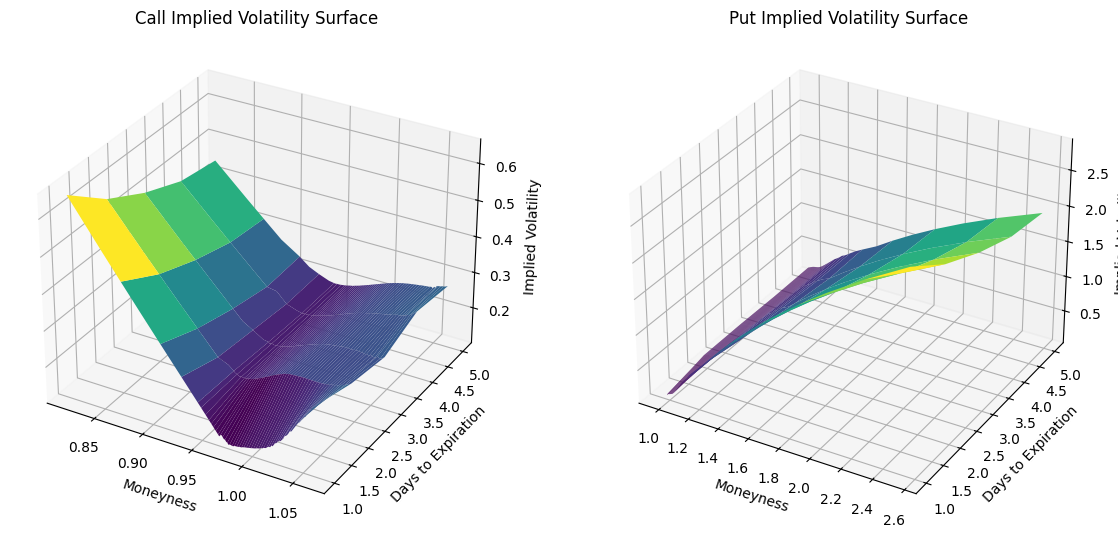

In [460]:
# Plot them side by side 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def combined_surface(date):
    # Filter data for call options
    call_df = data[(data['cp_flag'] == 'C') & (data['date'] == date)]
    call_surface = (
        call_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    # Filter data for put options
    put_df = data[(data['cp_flag'] == 'P') & (data['date'] == date)]
    put_surface = (
        put_df[['maturity', 'moneyness', 'impl_volatility']]
        .pivot_table(values='impl_volatility', index='moneyness', columns='maturity')
        .dropna()
    )

    # Set up the figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(14, 8))

    # Get the meshgrid values for calls
    x1, y1 = call_surface.columns.values, call_surface.index.values
    z1 = call_surface.values
    X1, Y1 = np.meshgrid(x1, y1)

    # Get the meshgrid values for puts
    x2, y2 = put_surface.columns.values, put_surface.index.values
    z2 = put_surface.values
    X2, Y2 = np.meshgrid(x2, y2)

    color = 'viridis'
    # Plot the call surface
    surf1 = ax1.plot_surface(Y1, X1, z1, cmap=color)
    ax1.set_title('Call Implied Volatility Surface')
    ax1.set_xlabel('Moneyness')
    ax1.set_ylabel('Days to Expiration')
    ax1.set_zlabel('Implied Volatility')

    # Plot the put surface
    surf2 = ax2.plot_surface(Y2, X2, z2, cmap=color)
    ax2.set_title('Put Implied Volatility Surface')
    ax2.set_xlabel('Moneyness')
    ax2.set_ylabel('Days to Expiration')
    ax2.set_zlabel('Implied Volatility')

    # Add a single color bar for both subplots
    #fig.colorbar(surf2, ax=[ax1, ax2], shrink=0.5, aspect=10, pad=0.1, label='Implied Volatility')

    # Show the plot
    plt.show()

# Call the function to plot for a specific date and option types
combined_surface('2023-02-10')


In [402]:
print(data[(data['date']=='2023-02-10') & (data['cp_flag'] == 'C')]['maturity'].unique())

[5 0 1 2 3 4]


In [406]:
for i in data['date'].unique():
    print(i)
    print(data[data['date']==i]['maturity'].unique())

2012-01-03T00:00:00.000000000
[3]
2012-01-04T00:00:00.000000000
[2]
2012-01-05T00:00:00.000000000
[1]
2012-01-06T00:00:00.000000000
[0 5]
2012-01-09T00:00:00.000000000
[4]
2012-01-10T00:00:00.000000000
[3]
2012-01-11T00:00:00.000000000
[2]
2012-01-12T00:00:00.000000000
[1]
2012-01-13T00:00:00.000000000
[0]
2012-01-17T00:00:00.000000000
[4]
2012-01-18T00:00:00.000000000
[3]
2012-01-19T00:00:00.000000000
[2]
2012-01-20T00:00:00.000000000
[5]
2012-01-23T00:00:00.000000000
[4]
2012-01-24T00:00:00.000000000
[3]
2012-01-25T00:00:00.000000000
[2]
2012-01-26T00:00:00.000000000
[1]
2012-01-27T00:00:00.000000000
[0 5]
2012-01-30T00:00:00.000000000
[4]
2012-01-31T00:00:00.000000000
[3]
2012-02-01T00:00:00.000000000
[2]
2012-02-02T00:00:00.000000000
[1]
2012-02-03T00:00:00.000000000
[0 5]
2012-02-06T00:00:00.000000000
[4]
2012-02-07T00:00:00.000000000
[3]
2012-02-08T00:00:00.000000000
[2]
2012-02-09T00:00:00.000000000
[1]
2012-02-10T00:00:00.000000000
[0]
2012-02-13T00:00:00.000000000
[5]
2012-02-